In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop


In [3]:
turbine = pd.read_csv("gas_turbines.csv")

In [4]:
turbine

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [6]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
turbine.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

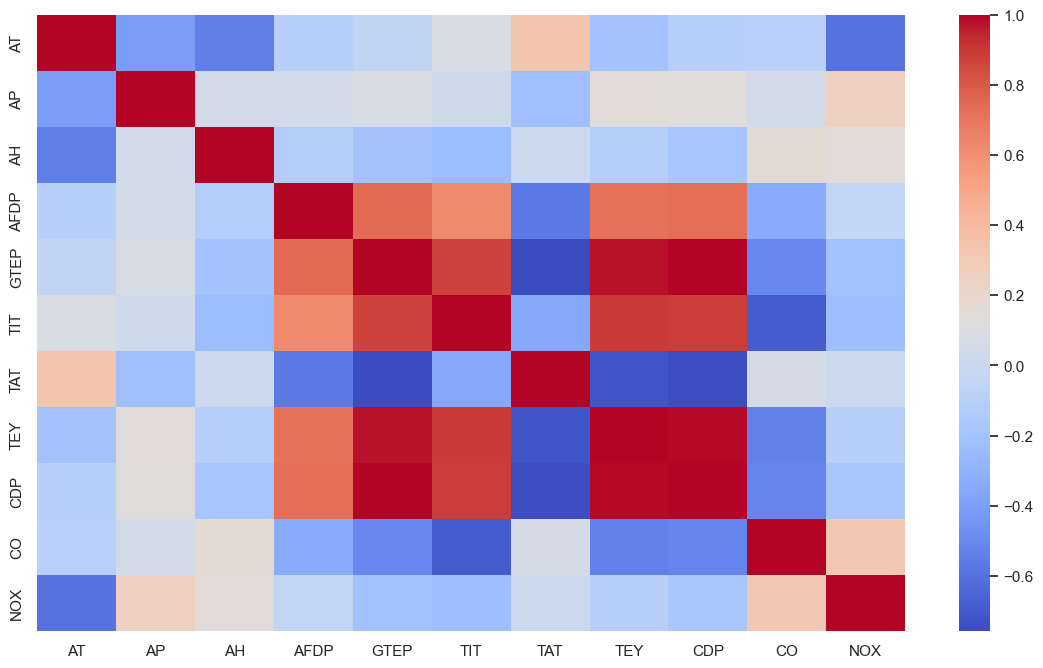

In [8]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = turbine.corr()
heatmap = sns.heatmap(corr, cmap="coolwarm")

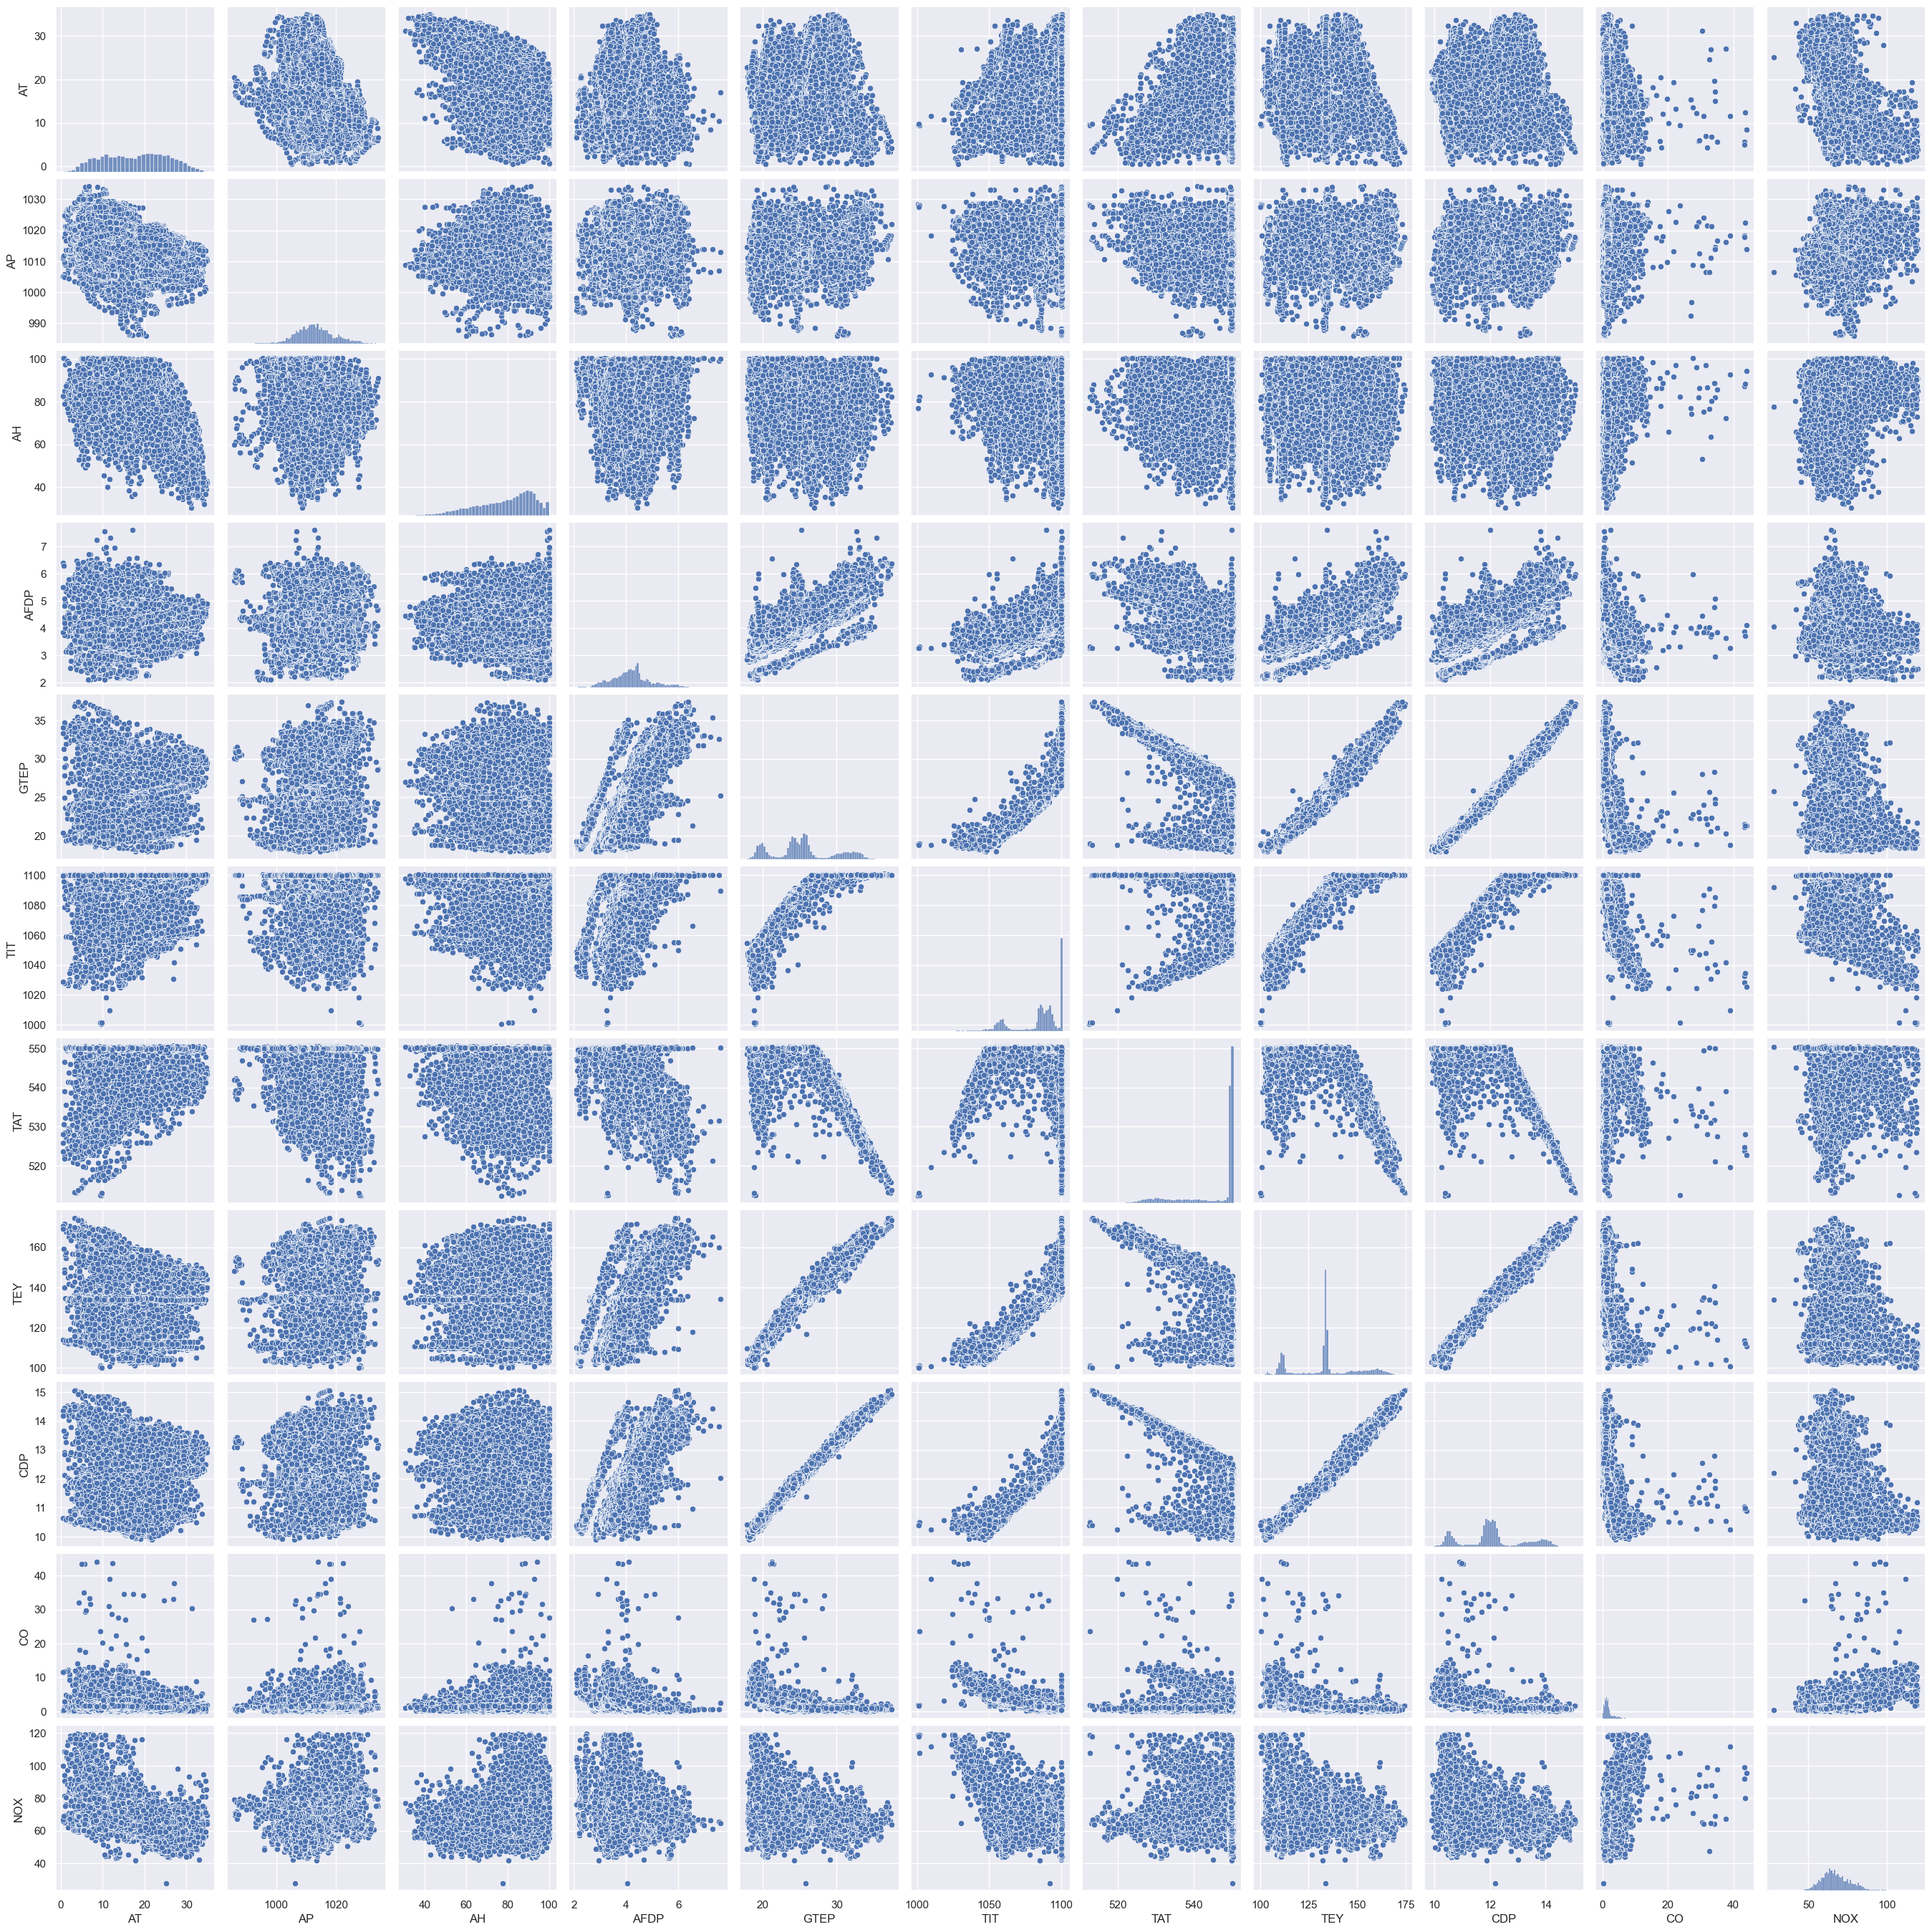

In [29]:
sns.set_style("darkgrid")
sns.pairplot(turbine)
plt.show()

In [25]:
X = pd.concat([turbine.iloc[:, :7], turbine.iloc[:,8:]], axis=1)
y = turbine.iloc[:, 7]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_train

array([[ 0.09064825, -0.46034064,  0.93269519, ..., -1.37938636,
         0.19390583, -0.74980549],
       [-1.37711607,  1.71168127, -0.47586479, ...,  1.83720977,
        -0.68140743, -0.31903163],
       [-1.04551275, -1.17913925,  1.35013747, ...,  1.42049579,
        -0.6524709 ,  0.20584473],
       ...,
       [-0.18703153,  0.25845798, -0.21689999, ..., -1.51738315,
         1.64099971, -0.01045629],
       [-1.63925319,  0.539727  ,  0.66649068, ..., -1.46926585,
         1.43406186,  4.37868389],
       [-1.55453509,  2.07108058,  0.27663174, ..., -0.37981754,
         0.10733252,  1.2320237 ]])

In [28]:
X_test = scale.fit_transform(X_test)
X_test

array([[ 0.84213512, -0.44915165, -0.26847388, ...,  0.11803713,
        -0.33567785, -0.69025369],
       [ 0.36227827,  0.20355214,  0.79782061, ..., -1.17198929,
         0.3224025 , -1.0937254 ],
       [ 0.33751487, -0.09171862,  0.24618608, ...,  0.0340228 ,
        -0.0142341 , -0.31617831],
       ...,
       [-0.06541736, -0.65117901,  0.51978341, ...,  1.50472519,
        -0.16947734,  0.19539302],
       [-0.98100476,  0.21909271,  1.3851196 , ..., -0.22253707,
        -0.2712694 ,  0.76228205],
       [-0.41184159, -0.65117901, -0.75343771, ...,  1.48033393,
        -0.12049193,  0.28705698]])

In [40]:
def regression_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    
    oppti = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error',optimizer = oppti,metrics=['mae','mse'])
    return model
    


In [44]:
model1 = KerasRegressor(build_fn=regression_model, verbose=0)
batch_size = [10,50,100]
epochs = [40,70,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model1, param_grid=param_grid, cv = KFold(),verbose=5)
grid_res = gsv.fit(X_train,y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_24364\3167532497.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 = KerasRegressor(build_fn=regression_model, verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....batch_size=10, epochs=40;, score=-18097.498 total time= 1.2min
[CV 2/5] END .....batch_size=10, epochs=40;, score=-18008.553 total time= 1.3min
[CV 3/5] END .....batch_size=10, epochs=40;, score=-18028.402 total time= 1.2min
[CV 4/5] END .....batch_size=10, epochs=40;, score=-18035.953 total time= 1.2min
[CV 5/5] END .....batch_size=10, epochs=40;, score=-17898.871 total time= 1.2min
[CV 1/5] END .....batch_size=10, epochs=70;, score=-18097.498 total time= 2.1min
[CV 2/5] END .....batch_size=10, epochs=70;, score=-18008.553 total time= 2.2min
[CV 3/5] END .....batch_size=10, epochs=70;, score=-18028.402 total time= 2.2min
[CV 4/5] END .....batch_size=10, epochs=70;, score=-18035.953 total time= 2.2min
[CV 5/5] END .....batch_size=10, epochs=70;, score=-17898.871 total time= 2.1min
[CV 1/5] END ....batch_size=10, epochs=100;, score=-18097.498 total time= 3.0min
[CV 2/5] END ....batch_size=10, epochs=100;, scor

In [47]:
print(grid_res.best_params_, grid_res.best_score_)

{'batch_size': 100, 'epochs': 70} -18013.855078125


In [49]:
def regression_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator= model, param_grid=param_grid, cv=KFold() ,verbose=5)
grid_res = gsv.fit(X_train,y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_24364\4268099804.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18097.494 total time=   3.5s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18008.555 total time=   4.2s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18028.408 total time=   3.9s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18035.955 total time=   4.0s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17898.863 total time=   5.1s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18097.494 total time=   4.0s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18008.555 total time=   3.6s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18028.408 total time=   3.6s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18036.324 total time=   4.1s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17898.863 total time=   3.7s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=-18097

In [50]:
print(grid_res.best_params_,grid_res.best_score_)

{'dropout_rate': 0.0, 'learning_rate': 0.1} -18013.855078125


## Tuning the hyperparameters

In [51]:
def regression_model(activation_function,inti):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=0.1)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

In [53]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
activation_function = ['relu', 'tanh','softmax','linear']
inti = ['uniform', 'zero','normal']
param_grid = dict(activation_function = activation_function,inti = inti)
gsv_m = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose = 5)
grid_resu = gsv_m.fit(X_train,y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_24364\4161993674.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation_function=relu, inti=uniform;, score=-18097.494 total time=   3.8s
[CV 2/5] END activation_function=relu, inti=uniform;, score=-18008.555 total time=   3.9s
[CV 3/5] END activation_function=relu, inti=uniform;, score=-18028.408 total time=   3.5s
[CV 4/5] END activation_function=relu, inti=uniform;, score=-18035.955 total time=   3.2s
[CV 5/5] END activation_function=relu, inti=uniform;, score=-17898.863 total time=   3.2s
[CV 1/5] END activation_function=relu, inti=zero;, score=-18097.494 total time=   3.5s
[CV 2/5] END activation_function=relu, inti=zero;, score=-18008.555 total time=   3.6s
[CV 3/5] END activation_function=relu, inti=zero;, score=-18028.408 total time=   3.2s
[CV 4/5] END activation_function=relu, inti=zero;, score=-18035.955 total time=   3.5s
[CV 5/5] END activation_function=relu, inti=zero;, score=-17898.863 total time=   3.2s
[CV 1/5] END activation_function=relu, inti=normal;, s

In [54]:
print(grid_resu.best_score_,grid_resu.best_params_)

-18013.855078125 {'activation_function': 'relu', 'inti': 'uniform'}


In [55]:
def regression_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(8,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation= 'sigmoid'))
    adam = Adam(learning_rate= 0.1)
    model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae','mse'])
    return model

In [56]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
neuron1 = [16,12,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2 = neuron2)
gsvp = GridSearchCV(estimator = model,param_grid = param_grid,cv=KFold(),verbose=5)
grid_result = gsvp.fit(X_train,y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_24364\619917919.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......neuron1=16, neuron2=12;, score=-18097.494 total time=   4.6s
[CV 2/5] END .......neuron1=16, neuron2=12;, score=-18008.555 total time=   3.2s
[CV 3/5] END .......neuron1=16, neuron2=12;, score=-18028.408 total time=   3.4s
[CV 4/5] END .......neuron1=16, neuron2=12;, score=-18035.955 total time=   3.1s
[CV 5/5] END .......neuron1=16, neuron2=12;, score=-17898.863 total time=   3.1s
[CV 1/5] END ........neuron1=16, neuron2=8;, score=-18097.494 total time=   3.2s
[CV 2/5] END ........neuron1=16, neuron2=8;, score=-18008.555 total time=   3.3s
[CV 3/5] END ........neuron1=16, neuron2=8;, score=-18028.408 total time=   4.0s
[CV 4/5] END ........neuron1=16, neuron2=8;, score=-18035.955 total time=   4.5s
[CV 5/5] END ........neuron1=16, neuron2=8;, score=-17898.863 total time=   3.2s
[CV 1/5] END ........neuron1=16, neuron2=4;, score=-18097.494 total time=   3.4s
[CV 2/5] END ........neuron1=16, neuron2=4;, scor

In [57]:
print(grid_result.best_score_,grid_result.best_params_)

-18013.855078125 {'neuron1': 16, 'neuron2': 12}


In [58]:
model = Sequential()
model.add(Dense(16,input_dim = 10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(12,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.0))
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
optimizer = RMSprop(learning_rate=0.1)
model.compile(loss='mse',optimizer = optimizer,metrics=['mae','mse'])

In [61]:
model.fit(X_train,y_train,batch_size=100,epochs=40)
y_pred = model.predict(X_train)

Epoch 1/40
106/106 [==============================] - 0s 990us/step - loss: 29.2707 - mae: 4.0760 - mse: 29.2707
Epoch 2/40
106/106 [==============================] - 0s 947us/step - loss: 30.2652 - mae: 4.3609 - mse: 30.2652
Epoch 3/40
106/106 [==============================] - 0s 952us/step - loss: 30.3892 - mae: 4.2029 - mse: 30.3892
Epoch 4/40
106/106 [==============================] - 0s 981us/step - loss: 29.6167 - mae: 4.3002 - mse: 29.6167
Epoch 5/40
106/106 [==============================] - 0s 936us/step - loss: 30.9515 - mae: 4.4691 - mse: 30.9515
Epoch 6/40
106/106 [==============================] - 0s 918us/step - loss: 30.9710 - mae: 4.4433 - mse: 30.9710
Epoch 7/40
106/106 [==============================] - 0s 958us/step - loss: 30.6064 - mae: 4.4824 - mse: 30.6064
Epoch 8/40
106/106 [==============================] - 0s 980us/step - loss: 29.3179 - mae: 4.3424 - mse: 29.3179
Epoch 9/40
106/106 [==============================] - 0s 1ms/step - loss: 29.4323 - mae: 4.3438 

In [62]:
model.summary()

Model: "sequential_429"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1287 (Dense)          (None, 16)                176       
                                                                 
 dropout_858 (Dropout)       (None, 16)                0         
                                                                 
 dense_1288 (Dense)          (None, 12)                204       
                                                                 
 dropout_859 (Dropout)       (None, 12)                0         
                                                                 
 dense_1289 (Dense)          (None, 1)                 13        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [66]:
mean_absolute_error(y_train,y_pred)

5.773878932752489

In [69]:
mean_squared_error(y_train,y_pred)

45.4179026010504

In [71]:
test_score = model.evaluate(X_test,y_test)

141/141 [==============================] - 0s 853us/step - loss: 47.9050 - mae: 5.9809 - mse: 47.9050


In [73]:
y_test_pred = model.predict(X_test)

141/141 [==============================] - 0s 767us/step


In [74]:
mean_absolute_error(y_test,y_test_pred)

5.980895509043484

In [75]:
mean_squared_error(y_test,y_test_pred)

47.90498508839027